In [17]:
#importing the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
#importing the dataset
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [19]:
#getting some basic info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


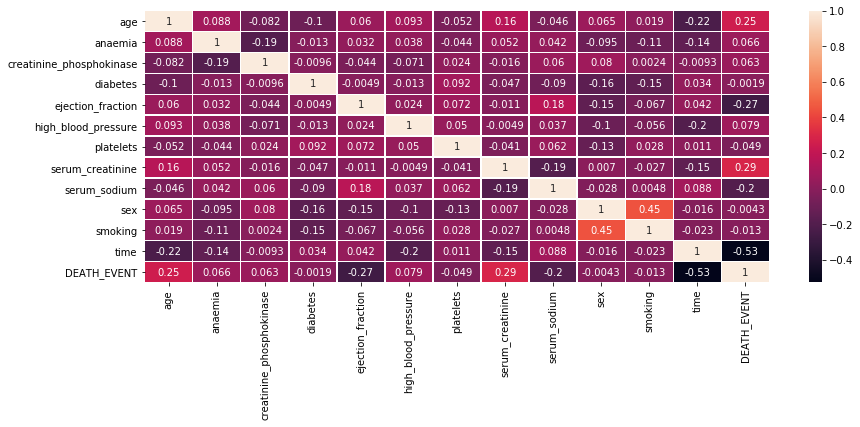

In [20]:
#visualising the data
plt.figure(figsize=(14,5))
sns.heatmap(df.corr(),annot = True,linewidth=0.5)

In [21]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [22]:
features = ['age', 'anaemia', 'creatinine_phosphokinase','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'smoking', 'time']

In [23]:
X = df[features]
y = df['DEATH_EVENT']

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=1)

In [25]:
train_x

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,smoking,time
161,45.0,1,130,35,0,174000.0,0.8,139,1,121
260,55.0,0,66,40,0,203000.0,1.0,138,0,233
218,68.0,1,1021,35,0,271000.0,1.1,134,0,197
123,60.0,1,582,30,1,127000.0,0.9,145,0,95
39,60.0,0,235,38,0,329000.0,3.0,142,0,30
...,...,...,...,...,...,...,...,...,...,...
203,60.0,0,59,25,1,212000.0,3.5,136,1,187
255,52.0,1,191,30,1,334000.0,1.0,142,1,216
72,85.0,0,5882,35,0,243000.0,1.0,132,1,72
235,77.0,1,109,50,1,406000.0,1.1,137,0,209


In [26]:
sc = StandardScaler()
train_x = sc.fit_transform(train_x)
test_x = sc.transform(test_x)

In [27]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(train_x, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred = classifier.predict(test_x)

In [29]:
len(y_pred)

60

In [30]:
test_y.count()

60

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(test_y, y_pred)
print(cm)
accuracy_score(test_y, y_pred)

[[43  3]
 [ 3 11]]


0.9